In [ ]:
%pip install pandas

In [ ]:
%pip install pyarrow

In [ ]:
import pandas as pd

# Specify the path to your Parquet file
parquet_file_path = '/Users/jenn/Downloads/train-00000-of-00001.parquet' 

    # Specify the path for the output CSV file
csv_file_path = '/Users/jenn/Downloads/Review.csv'
    # Read the Parquet file into a Pandas DataFrame
df = pd.read_parquet(parquet_file_path)

    # Convert the DataFrame to a CSV file
    # index=False prevents Pandas from writing the DataFrame index as a column in the CSV
df.to_csv(csv_file_path, index=False)

print(f"Successfully converted '{parquet_file_path}' to '{csv_file_path}'")


In [1]:
# Import dataset
import pandas as pd
data = pd.read_csv('/Users/jenn/Downloads/sample_review.csv')
print(data.head())

                                         review_text  review_score  \
0  Great game for anyone into puzzle games and de...           100   
1  Fantastic, this game doesn't just offer some o...           100   
2  Lone Survivor is a a truly compelling, thought...            90   
3  Great improvement from previous game unity, wh...            60   
4  I absolutely love the story and so far have no...           100   

  review_category  
0        positive  
1        positive  
2        positive  
3           mixed  
4        positive  


In [2]:
data.dtypes

review_text        object
review_score        int64
review_category    object
dtype: object

In [3]:
data.shape

(40000, 3)

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
review_text        0
review_score       0
review_category    0
dtype: int64


In [5]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [6]:
%pip install matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


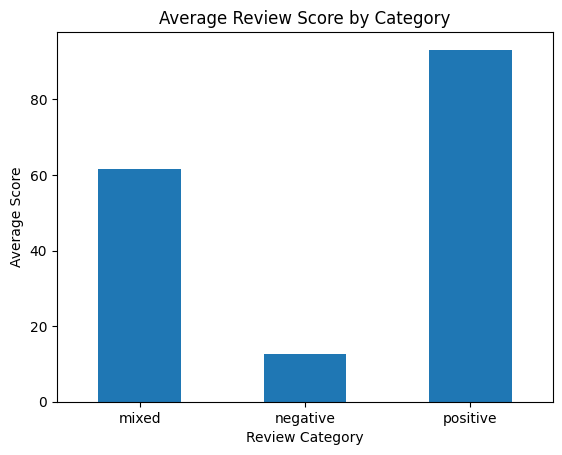

In [7]:
# Simple EDA - Plot the distribution of review_category
import matplotlib.pyplot as plt

data.groupby("review_category")["review_score"].mean().plot(kind="bar")
plt.title("Average Review Score by Category")
plt.xlabel("Review Category")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()


In [21]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [3]:
# Data Preprocessing
# Removing stop words and punctuation

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation & special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # tokenisation
    tokens = nltk.word_tokenize(text)
    
    # remove stopwords & stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)


In [4]:
import nltk
import re

data['clean_review'] = data['review_text'].apply(preprocess_text)


In [5]:
# Label Encoding

review_order = {'negative': 0, 'mixed': 1, 'positive': 2}
data['review_category_encoded'] = data['review_category'].map(review_order)
print(data)

                                             review_text  review_score  \
0      Great game for anyone into puzzle games and de...           100   
1      Fantastic, this game doesn't just offer some o...           100   
2      Lone Survivor is a a truly compelling, thought...            90   
3      Great improvement from previous game unity, wh...            60   
4      I absolutely love the story and so far have no...           100   
...                                                  ...           ...   
39995  Game was, and still is amazing at its core. Bu...             0   
39996  Great game if ONLY PLAYED ONLINE. I say that b...           100   
39997  Overrated. I love indie titles, and play my fa...            60   
39998  Playing it in 2022 it has that trademark Xbox-...            80   
39999  Shoutout to thehoang123 for being the only per...           100   

      review_category                                       clean_review  \
0            positive  great game a

In [6]:
# Variable assignment
x = data['clean_review']
y = data['review_category_encoded']

In [7]:
# Data splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y) 

# Train and Test shape
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (28000,)
x_test shape: (12000,)
y_train shape: (28000,)
y_test shape: (12000,)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


review_category_encoded
2    23501
0    10080
1     6419
Name: count, dtype: int64


<Axes: xlabel='review_category', ylabel='count'>

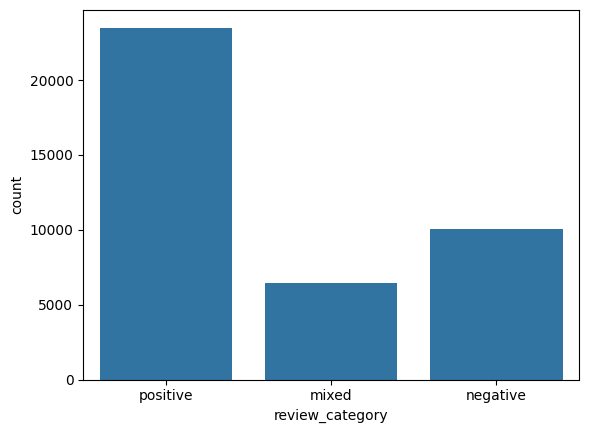

In [9]:
# Value counts
print(data['review_category_encoded'].value_counts())

import seaborn as sns
sns.countplot(x = data['review_category'])

In [19]:
%pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


review_category_encoded
0    4493
1    4493
2    4493
Name: count, dtype: int64


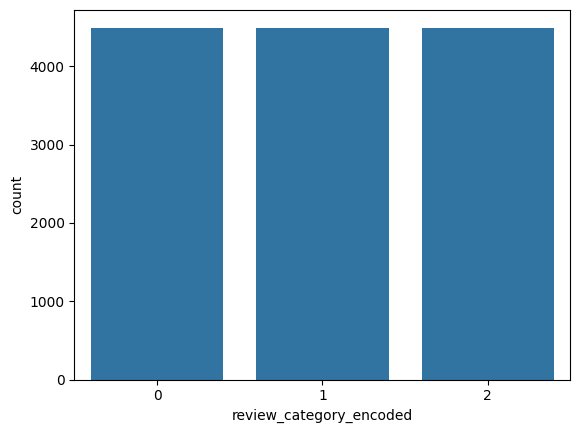

In [10]:
# Class Balancing using Undersampling

from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x_train_vec, y_train)
sns.countplot(x = y_nm)

print(y_nm.value_counts())

In [12]:
# Logistic Regression Model (draft)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, classification_report

LR_classifier = LogisticRegression(class_weight = 'balanced').fit(x_train_vec, y_train)
predicted_LR= LR_classifier.predict(x_test_vec)
print("F1 Score of LR:", f1_score(y_test, predicted_LR, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_LR))

F1 Score of LR: 0.7699659351872649
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      3024
           1       0.42      0.60      0.50      1926
           2       0.91      0.80      0.85      7050

    accuracy                           0.76     12000
   macro avg       0.70      0.72      0.70     12000
weighted avg       0.79      0.76      0.77     12000



In [18]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(x_test_vec)

print(classification_report(y_test, y_pred_best))


NameError: name 'grid' is not defined

In [ ]:
#import nltk
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jenn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report

MNB_classifier = MultinomialNB().fit(x_train_vec, y_train) # MODEL BUILDING
predicted_MNB = MNB_classifier.predict(x_test_vec) # Prediction
print("F1 Score of MNB:", f1_score(y_test, predicted_MNB, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_MNB))

F1 Score of MNB: 0.690841430131352
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72      3024
           1       0.59      0.07      0.12      1926
           2       0.73      0.98      0.84      7050

    accuracy                           0.75     12000
   macro avg       0.71      0.56      0.56     12000
weighted avg       0.73      0.75      0.69     12000



In [14]:
# Random Forest Classifier from Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

RF_classifier = RandomForestClassifier(class_weight = 'balanced').fit(x_train_vec, y_train)
predicted_RF = RF_classifier.predict(x_test_vec)
print("F1 Score of RF:", f1_score(y_test, predicted_RF, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_RF))

F1 Score of RF: 0.6798043937019217
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.70      3024
           1       0.57      0.05      0.10      1926
           2       0.72      0.97      0.83      7050

    accuracy                           0.74     12000
   macro avg       0.70      0.55      0.54     12000
weighted avg       0.72      0.74      0.68     12000



In [11]:
# SVC Classifier from Sklearn
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report

SVC_classifier = SVC(class_weight = 'balanced').fit(x_train_vec, y_train)
predicted_SVC= SVC_classifier.predict(x_test_vec)
print("F1 Score of SVC:", f1_score(y_test, predicted_SVC, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_SVC))

F1 Score of SVC: 0.7863893481243214
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      3024
           1       0.48      0.50      0.49      1926
           2       0.89      0.86      0.87      7050

    accuracy                           0.78     12000
   macro avg       0.71      0.72      0.71     12000
weighted avg       0.79      0.78      0.79     12000



In [16]:
# Multi Layer Perceptron Classifier from Sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report

MLP_classifier = MLPClassifier(max_iter = 1000).fit(x_train_vec, y_train)
predicted_MLP = MLP_classifier.predict(x_test_vec)
print("F1 Score of MLP:", f1_score(y_test, predicted_MLP, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_MLP))

F1 Score of MLP: 0.74270560983129
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      3024
           1       0.41      0.38      0.39      1926
           2       0.84      0.86      0.85      7050

    accuracy                           0.75     12000
   macro avg       0.66      0.65      0.65     12000
weighted avg       0.74      0.75      0.74     12000



In [17]:
# LinearSVC Classifier from Sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, classification_report

LSVC_classifier = LinearSVC().fit(x_train_vec, y_train)
predicted_LSVC= LSVC_classifier.predict(x_test_vec)
print("F1 Score of LinearSVC:", f1_score(y_test, predicted_LSVC, average = 'weighted'))
print("Classification Report:\n", classification_report(y_test, predicted_LSVC))

F1 Score of LinearSVC: 0.7680021624815049
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      3024
           1       0.51      0.31      0.39      1926
           2       0.84      0.92      0.88      7050

    accuracy                           0.78     12000
   macro avg       0.70      0.67      0.67     12000
weighted avg       0.76      0.78      0.77     12000



In [18]:
# ~~~~~~~~~~~~~~~~~~~~~~~ Model Comparison ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print("~~~~~~~~~~~~~~ Accuracies of the Classifiers ~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\nF1 Score of MNB Classifier:", f1_score(y_test, predicted_MNB, average = 'weighted'))
print("\nF1 Score of LR Classifier:", f1_score(y_test, predicted_LR, average = 'weighted'))
print("\nF1 Score of RF Classifier:", f1_score(y_test, predicted_RF, average = 'weighted'))
print("\nF1 Score of SVC Classifier:", f1_score(y_test, predicted_SVC, average = 'weighted'))
print("\nF1 Score of MLP Classifier:", f1_score(y_test, predicted_MLP, average = 'weighted'))
print("\nF1 Score of LSVC Classifier:", f1_score(y_test, predicted_LSVC, average = 'weighted'))

~~~~~~~~~~~~~~ Accuracies of the Classifiers ~~~~~~~~~~~~~~~~~~~~~~~~~

F1 Score of MNB Classifier: 0.690841430131352

F1 Score of LR Classifier: 0.7699659351872649

F1 Score of RF Classifier: 0.6798043937019217

F1 Score of SVC Classifier: 0.7863893481243214

F1 Score of MLP Classifier: 0.74270560983129

F1 Score of LSVC Classifier: 0.7680021624815049


In [ ]:
# HP Tuning
from sklearn.svm import SVC
SVC_classifier = SVC(class_weight = 'balanced')

from sklearn.model_selection import GridSearchCV
from numpy import arange

#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 42)

parameters = {
    'C' : [0.01, 0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf', 'poly', 'linear']
}

SVC_grid = GridSearchCV(SVC_classifier, param_grid = parameters, scoring = 'f1_weighted', cv = 5, verbose = 1)
SVC_grid.fit(x_train_vec, y_train)

print("Best Score: ", SVC_grid.best_score_)
print("Best Params: ", SVC_grid.best_params_)

# model evaluation of the tuned model
from sklearn.metrics import f1_score, classification_report

best_model = SVC_grid.best_estimator_
y_pred = best_model.predict(x_test_vec)

print("F1 Score: ", f1_score(y_test, y_pred, average = 'weighted'))
print("Classification Report: ", classification_report(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [ ]:
# HP Tuning
from sklearn.svm import SVC
SVC_classifier = SVC

from sklearn.model_selection import RandomizedSearchCV
from numpy import arange

#from sklearn.model_selection import StratifiedKFold
#skf = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 42)
 
parameters = {
    'C' : [0.01, 0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel' : ['rbf', 'poly', 'linear']
}
 
## Building Randomized Search algorithm with cross-validation and acc score.
SVC_rand = RandomizedSearchCV(estimator = SVC_classifier, param_distributions = parameters, scoring = 'f1_weighted', cv = 5, verbose = 1, n_iter = 100)

## Lastly, finding the best parameters.
SVC_rand.fit(x_train_vec, y_train)
best_parameters_SVC = SVC_rand.best_params_
best_score_SVC = SVC_rand.best_score_
print()
print("Best Params: ",best_parameters_SVC)
print("Best Score: ", best_score_SVC)


# model evaluation of the tuned model
from sklearn.metrics import f1_score, classification_report

final_model = SVC_rand.best_estimator_
y_pred_1 = final_model.predict(x_test_vec)

print("F1 Score: ", f1_score(y_test, y_pred_1, average = 'weighted'))
print("Classification Report: ", classification_report(y_test, y_pred_1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [ ]:
# Save and Load the classifier
import pickle
print(" \n~~~~~~~~~ Save and Load the classifier  ~~~~~~~~~ ")
saved_model = pickle.dumps(SVC_classifier) 
SVC_from_pickle = pickle.loads(saved_model) 
SVC_from_pickle.predict(x_test_vec) 

 
~~~~~~~~~ Save and Load the classifier  ~~~~~~~~~ 


array([0, 2, 2, ..., 0, 2, 2], shape=(188966,))

In [ ]:
# To be replaced by joblib

import pickle

# Confirm whether this is the tuned model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(SVC_classifier, f)

with open("tfidf.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [12]:
import joblib

# Save the trained SVC model
joblib.dump(SVC_classifier, "sentiment_model.joblib")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf.joblib")



['tfidf.joblib']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])

svc_param_grid = {
    'tfidf__max_features': [3000, 5000, 8000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [2, 5],
    'tfidf__max_df': [0.9],
    'tfidf__sublinear_tf': [True],

    'clf__kernel': ['linear', 'rbf'],
    'clf__C': [0.1, 1, 10]
}

